# Linear Regression

Linear regression is a technique used to model the relationships between observed variables. The idea behind simple linear regression is to "fit" the observations of two variables into a linear relationship between them. Graphically, the task is to draw the line that is "best-fitting" or "closest" to the points $(x_i,y_i),(x )$, where $x_i$ and $y_i$ are observations of the two variables which are expected to depend linearly on each other.


Regression is a common process used in many applications of statistics in the real world. There are two main types of applications:

**Predictions**: After a series of observations of variables, regression analysis gives a statistical model for the relationship between the variables. This model can be used to generate predictions: given two variables xx and $y$, the model can predict values of yy given future observations of $x$. This idea is used to predict variables in countless situations, e.g. the outcome of political elections, the behavior of the stock market, or the performance of a professional athlete.

**Correlation**: The model given by a regression analysis will often fit some kinds of data better than others. This can be used to analyze correlations between variables and to refine a statistical model to incorporate further inputs: if the model describes certain subsets of the data points very well, but is a poor predictor for other data points, it can be instructive to examine the differences between the different types of data points for a possible explanation. This type of application is common in scientific tests, e.g. of the effects of a proposed drug on the patients in a controlled study.

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [179]:
X = np.random.rand(100,1)

# w*x + b + noise
y = 2*X + 1 + 0.2*np.random.randn(100,1)

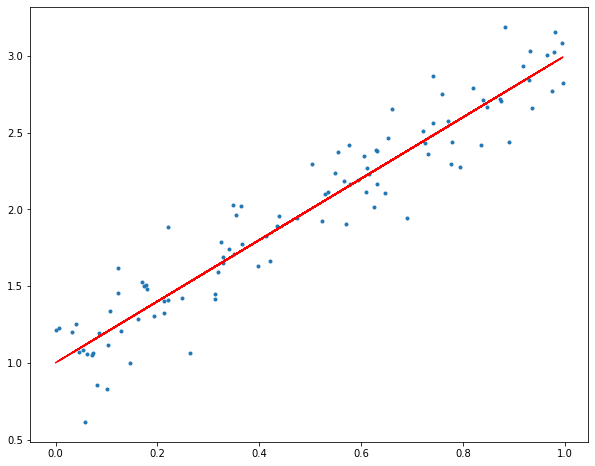

In [183]:
plt.figure(figsize=(10,8))
plt.plot(X,y, '.')
plt.plot(X, 2*X+1, 'r--')

In [2]:
data = pd.read_csv('data/price.csv')

In [3]:
data.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [4]:
data.isna().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

### Data Analysis

1. Central Limit Theorem
2. Create Sample and do hypothesis testing
3. Check Correlation and coLinearity
3. Understand the trend of the data and explain it through a story

## Pairplot

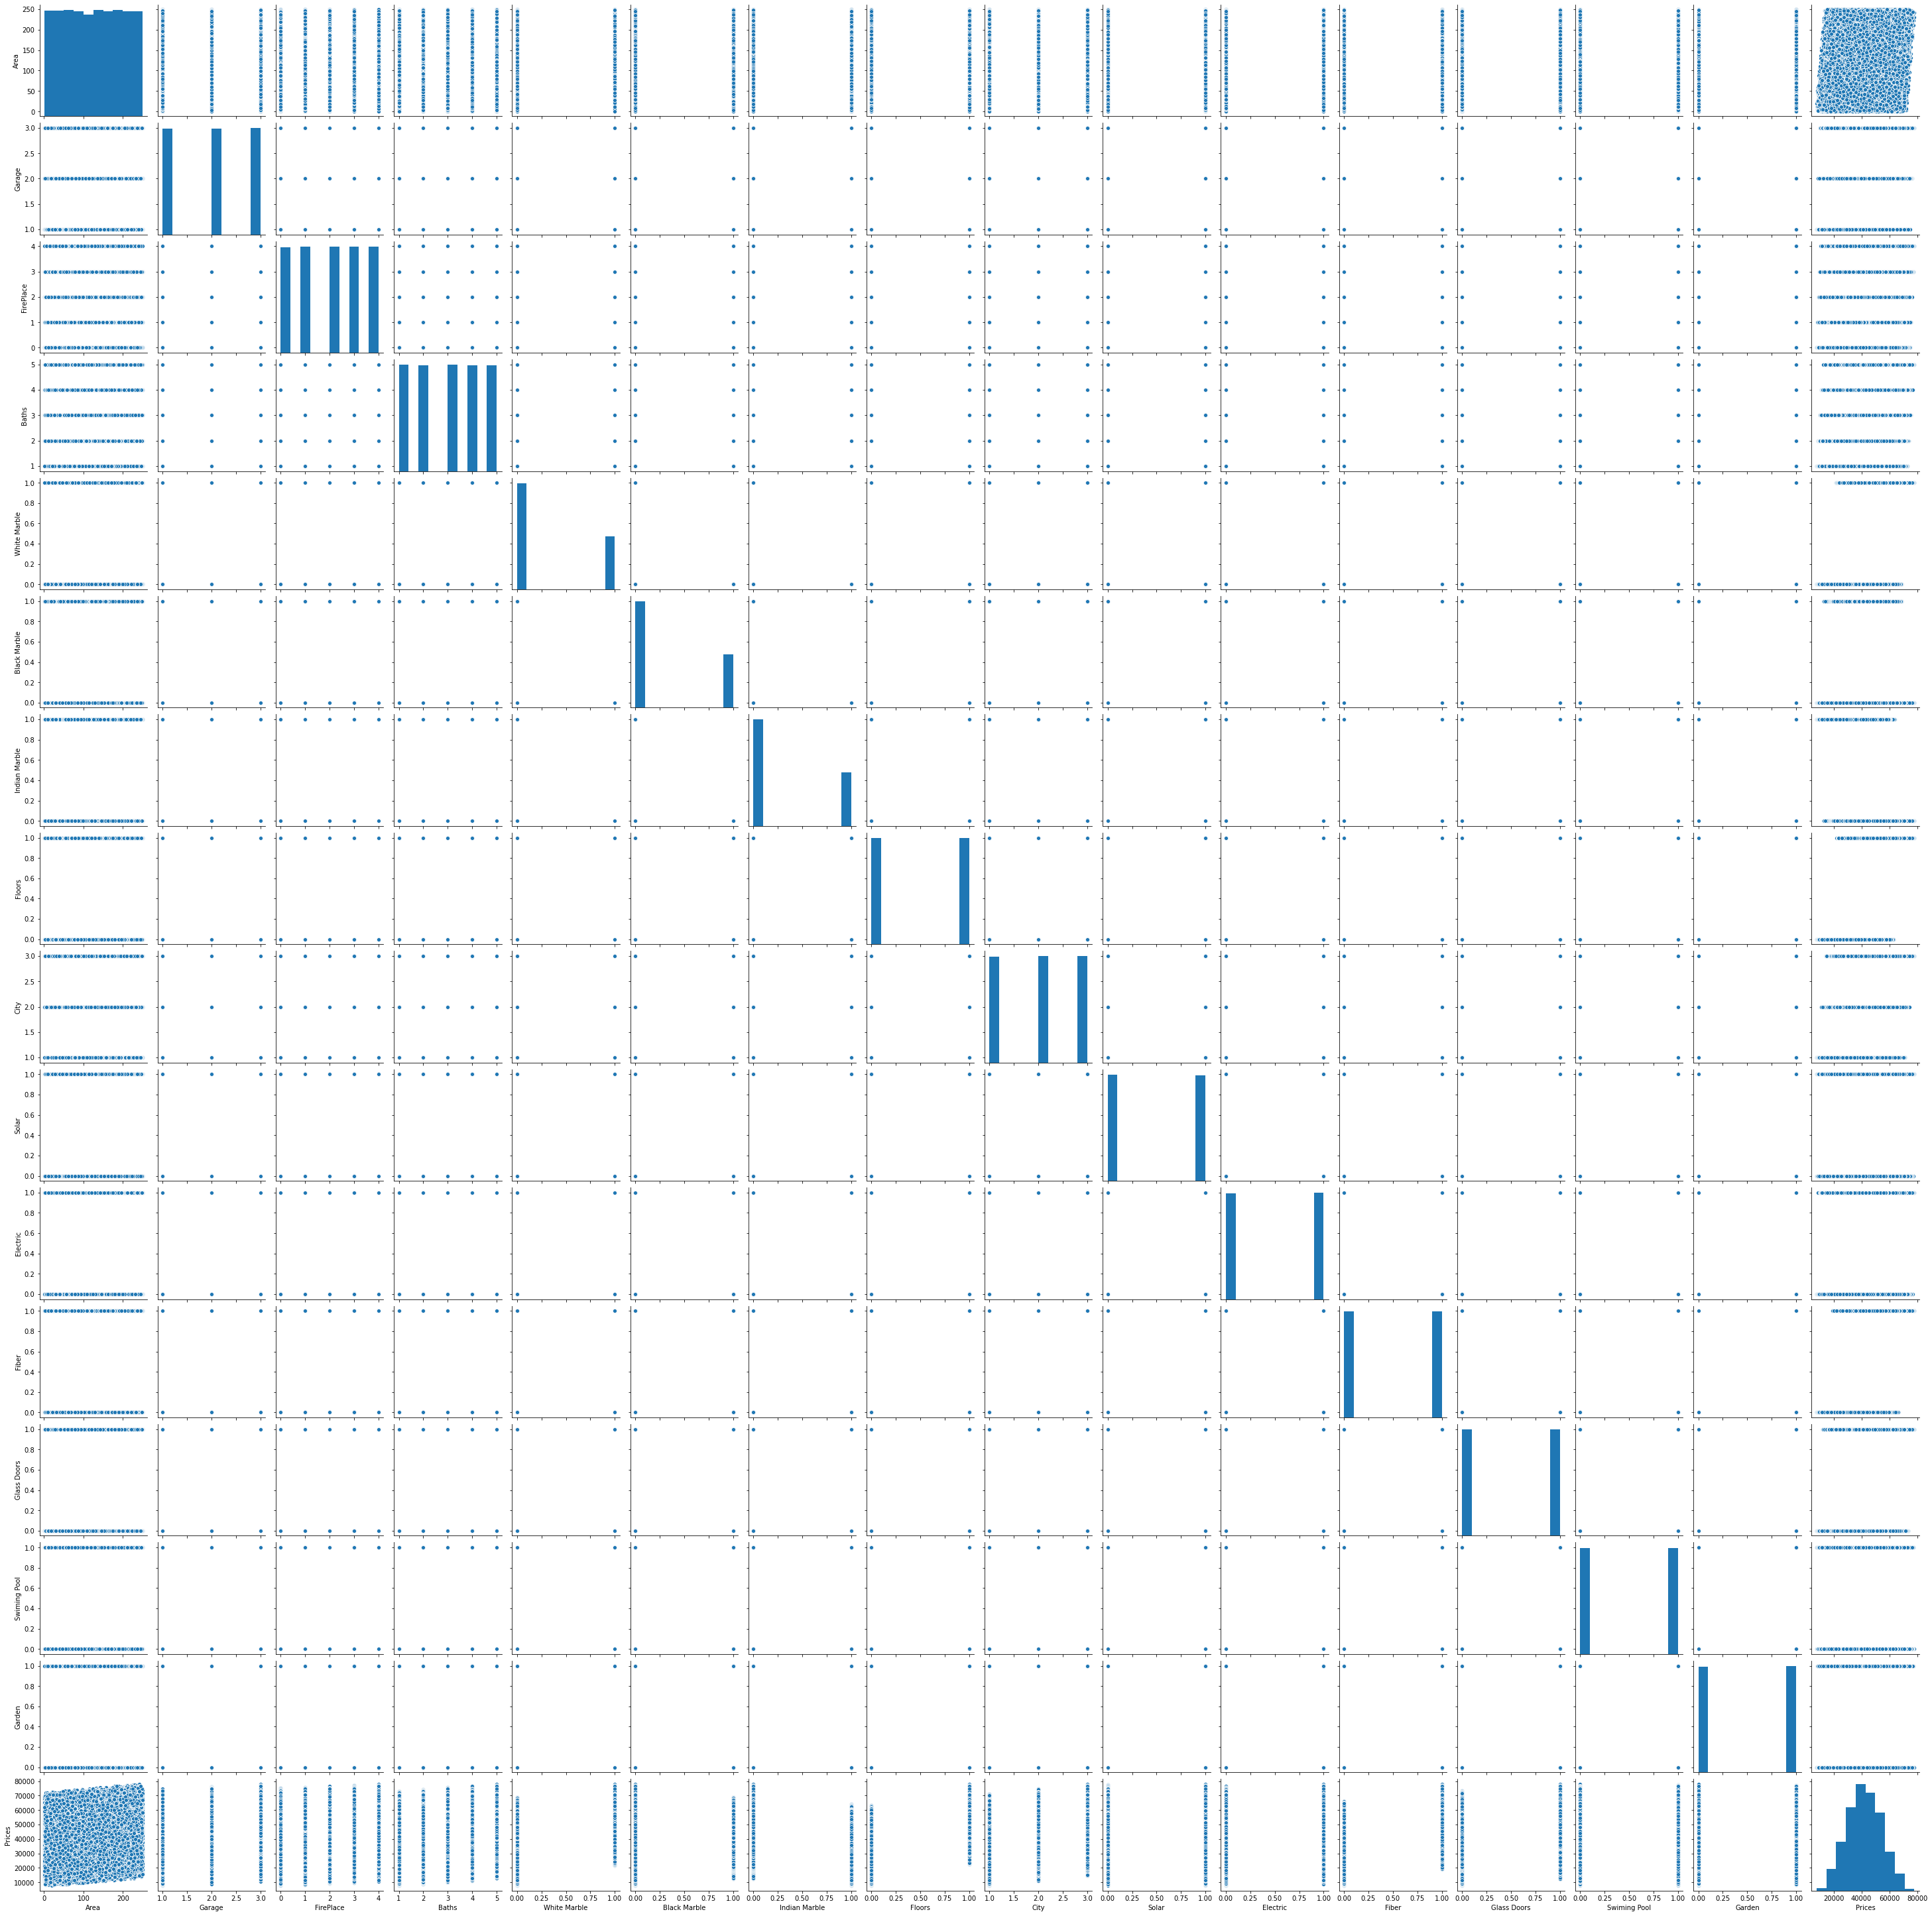

In [5]:
sns.pairplot(data)

In [14]:
sample = data.sample(n=int(len(data)*0.01), random_state=23)

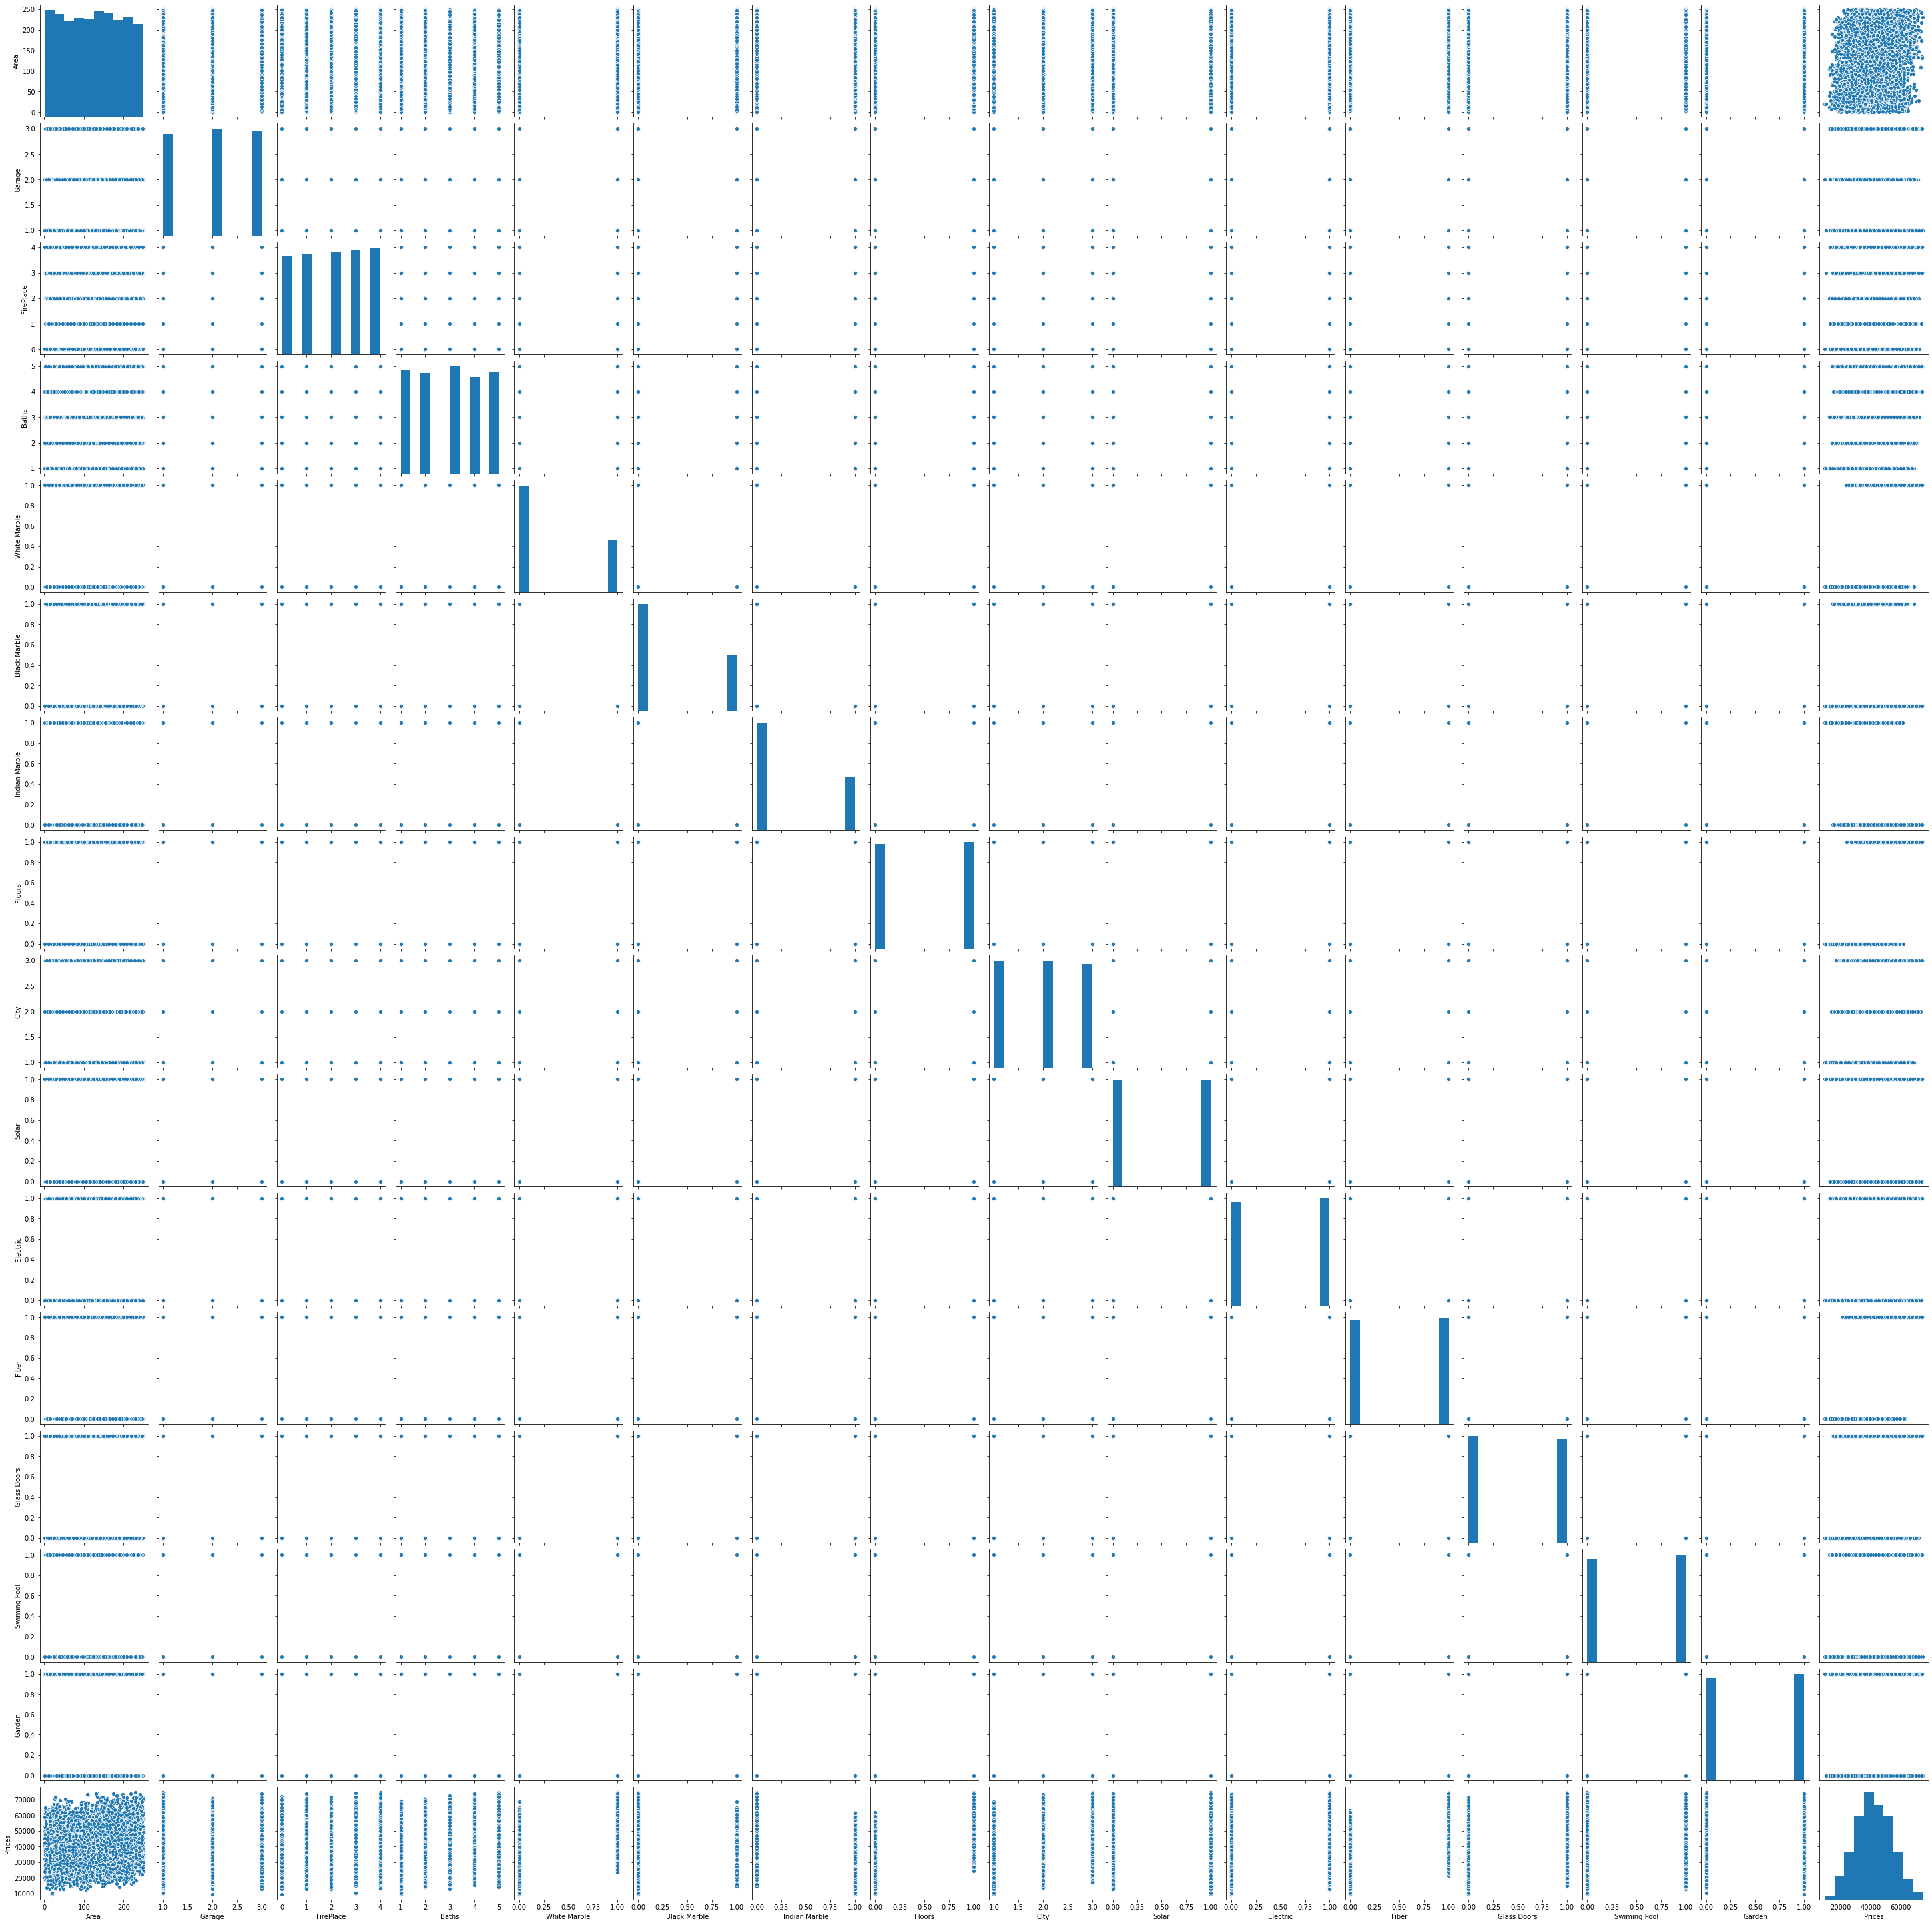

In [15]:
sns.pairplot(sample)

Seperate your dependent and independent variable. 

Your independent variable called $X$ and dependent variable called $y$ depends upon the problem statement.

In [118]:
df = sample[['Area', 'Garage', 'Baths', 'Floors' ,'Prices']]

In [73]:
X=df.drop('Prices', axis=1)
y=df['Prices']

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

In [76]:
X_train.shape,y_train.shape

((3500, 4), (3500,))

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
model = LinearRegression()

In [79]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
model.score(X_test, y_test)

0.42840376731439644

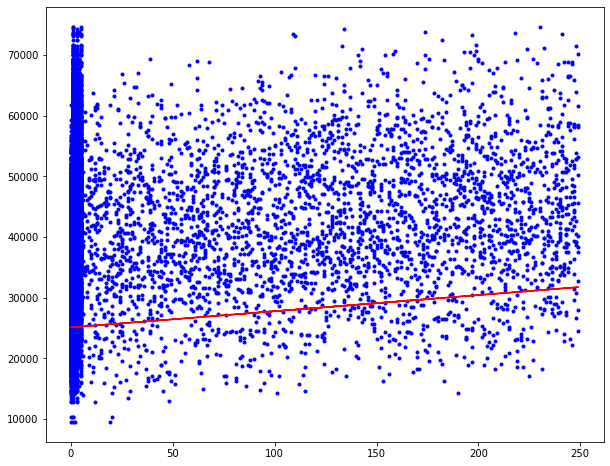

In [81]:
plt.figure(figsize=(10,8))
plt.plot(X_train, y_train, 'b.')
plt.plot(X_train, model.coef_[0]*X_train.values + model.intercept_, 'r-')

plt.show()

## Test

- Correlation
- Colinearity

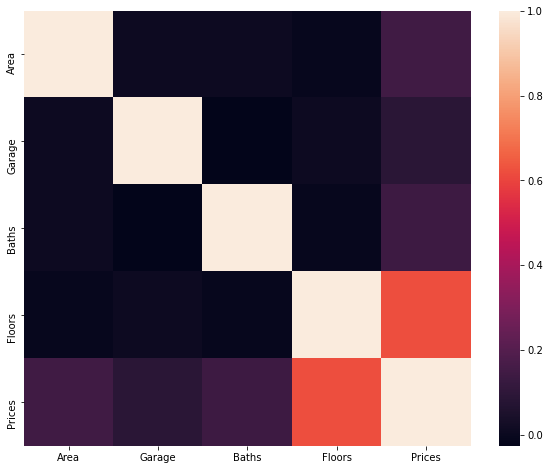

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())

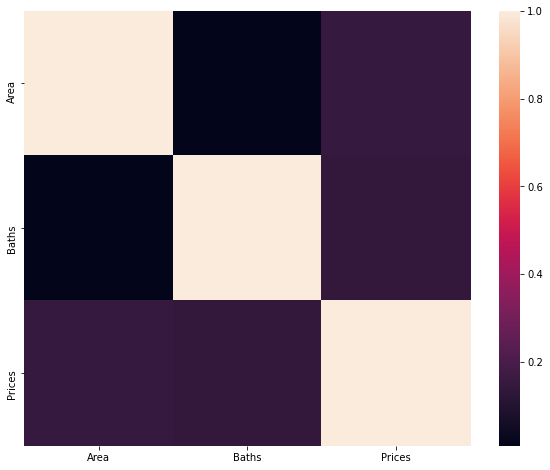

In [86]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(['Garage', 'Floors'], axis=1).corr())

In [103]:
X=df.drop(['Garage', 'Floors', 'Baths', 'Prices'], axis=1)
y=df['Prices']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

In [105]:
model = LinearRegression()

In [106]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
model.score(X_train, y_train)

0.02351168719416707

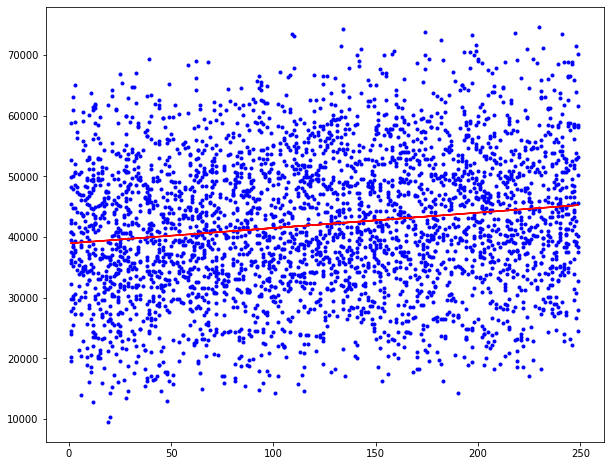

In [109]:
plt.figure(figsize=(10,8))
plt.plot(X_train, y_train, 'b.')
plt.plot(X_train, model.coef_[0]*X_train.values + model.intercept_, 'r-')

plt.show()